# Wikipedia WebScraping Project 

### Install Necessary requirements

In [3]:
%pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### Restart Kernel and run all cells

In [5]:
import requests 
url = "https://en.wikipedia.org/wiki/World_population"
response = requests.get(url)
response

<Response [200]>

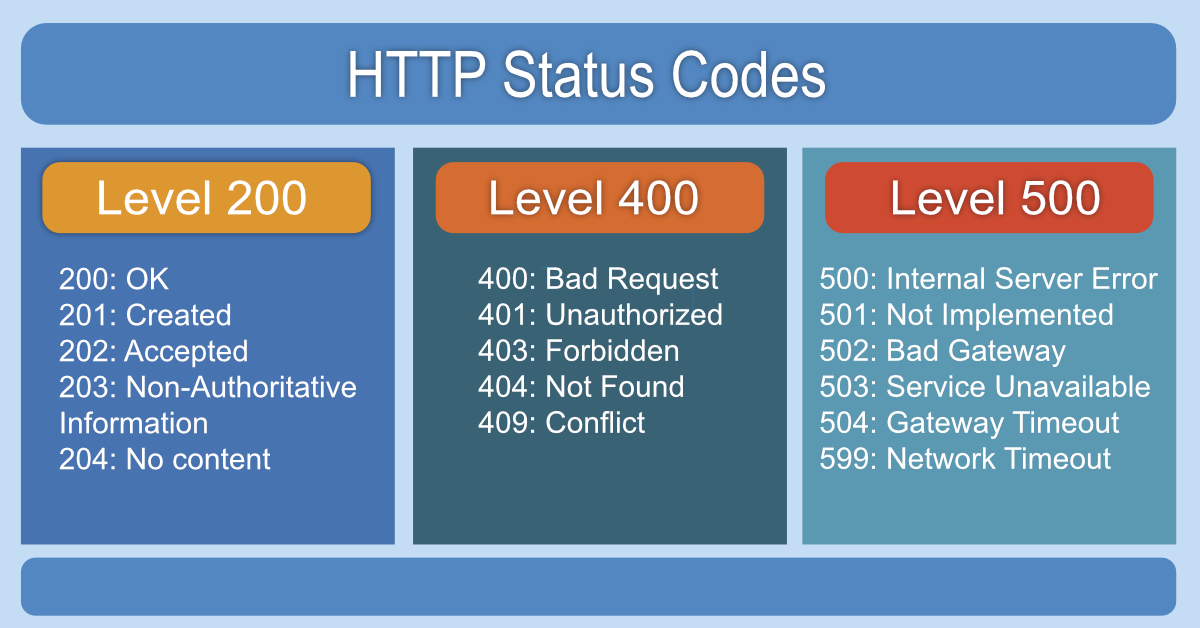

In [7]:
response.content[0:500]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clien'

### When response is 200 only then you can scrape website else 

In [9]:
url2 = "https://www.amazon.in/gp/product/B0C9JFWBH7/ref=s9_bw_cg_Budget_6b1_w?pf_rd_m=AT95IG9ONZD7S&pf_rd_s=merchandised-search-18&pf_rd_r=19YZ9G9DH6SEYMKSRMW1&pf_rd_t=101&pf_rd_p=7b7db973-ba87-4a47-abf3-19c07cbff7a8&pf_rd_i=1389401031"
response2 = requests.get(url2)
response2

<Response [503]>

### Because response code is 503 , i cannot scrape above website

In [11]:
response2.status_code

503

### Basic HTML Structure

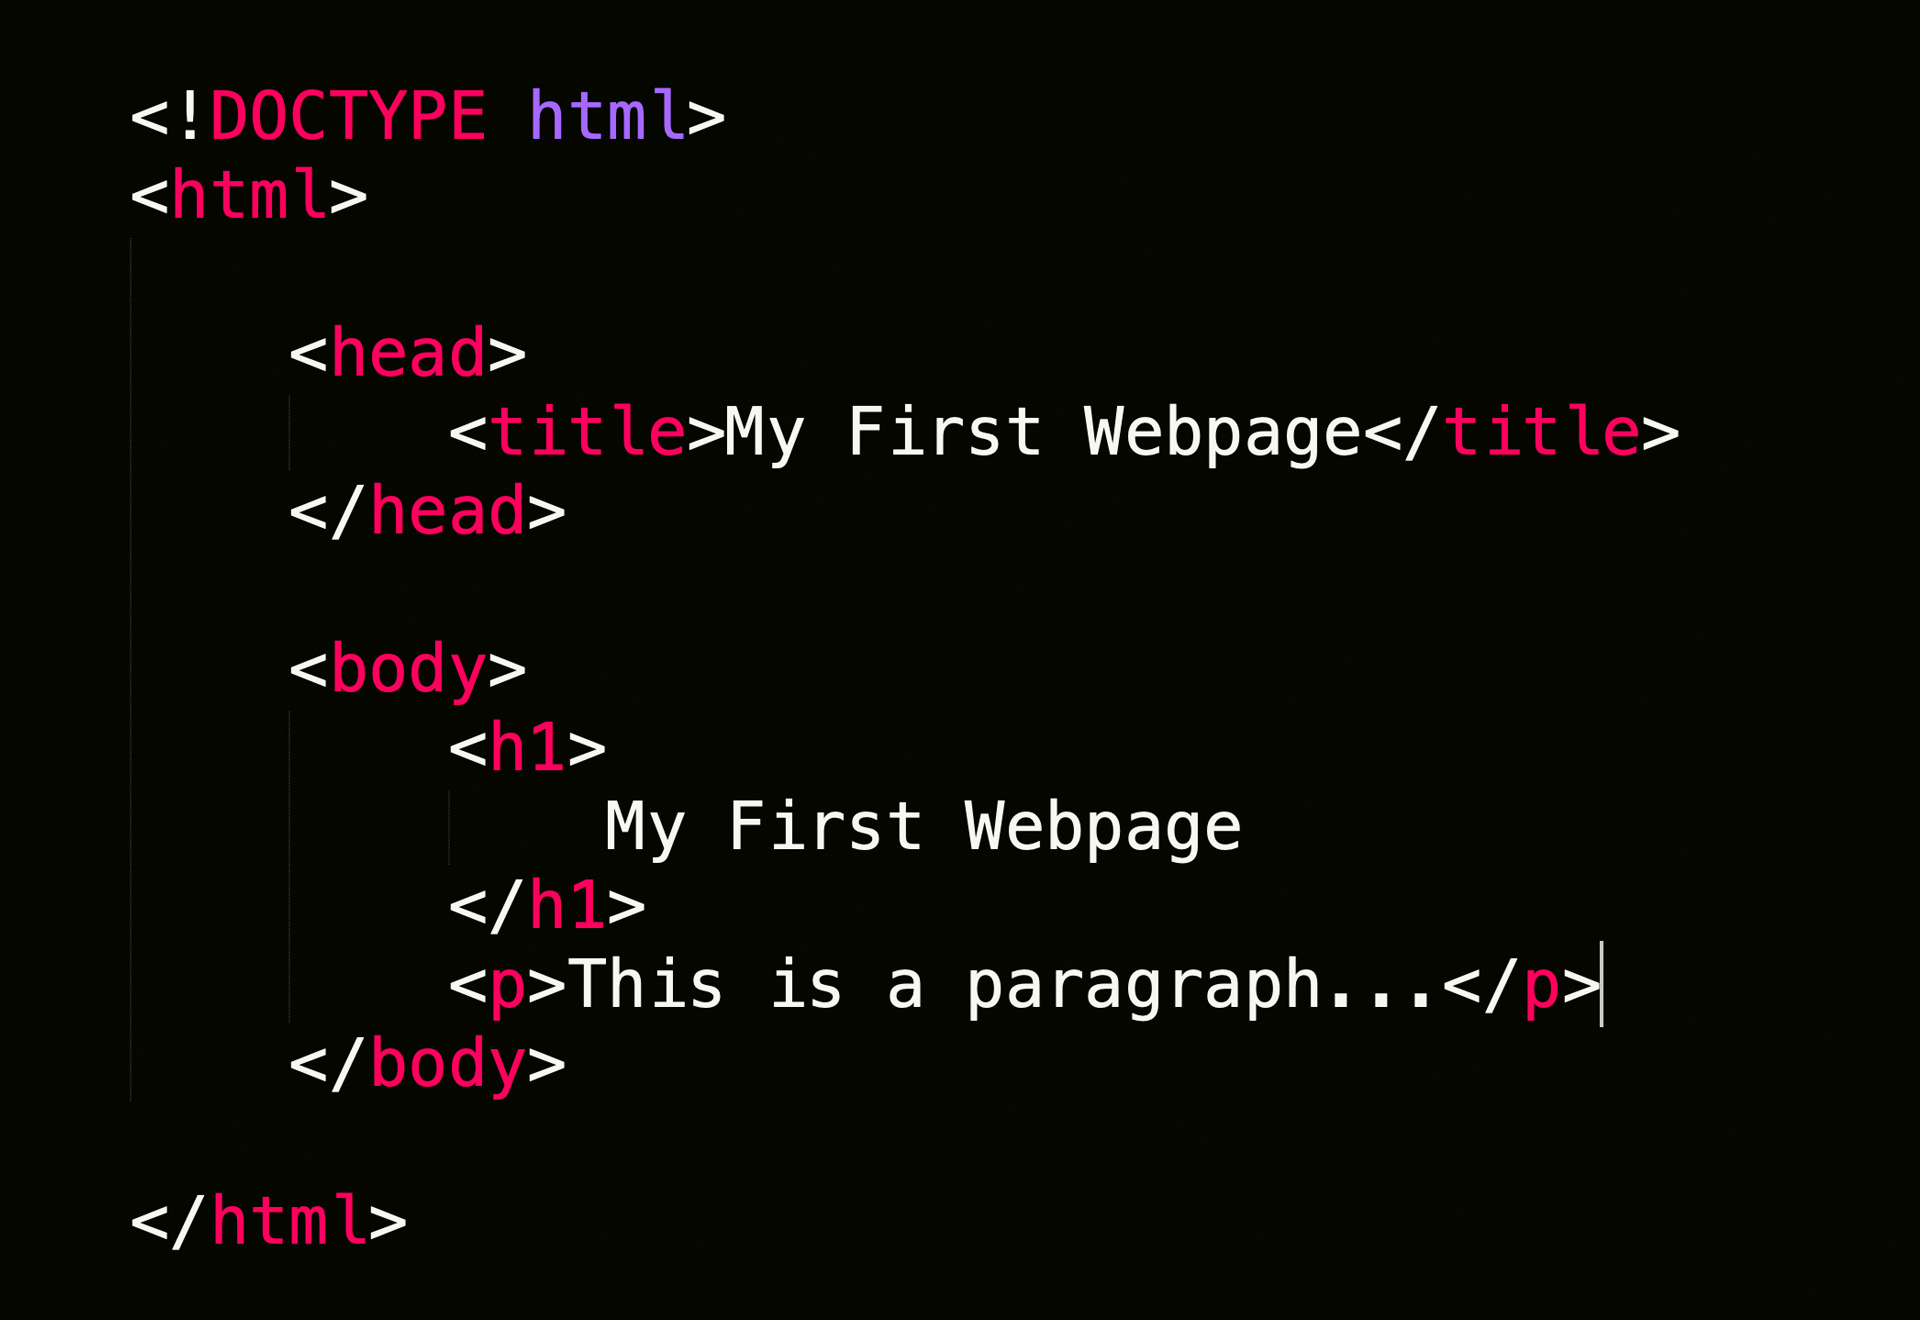

<h1>Heading 1</h1>
<h2>Heading 2</h2>
<h3>Heading 3</h3>
<h4>Heading 4</h4>
<h5>Heading 5</h5>
<h6>Heading 6</h6>

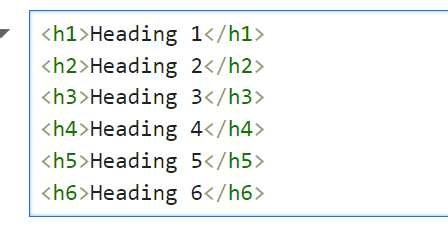

### Getting the title of website

In [17]:
from bs4 import BeautifulSoup

In [18]:
soup = BeautifulSoup(response.content)

In [19]:
type(soup)

bs4.BeautifulSoup

In [20]:
soup.find('title')

<title>World population - Wikipedia</title>

In [21]:
soup.find('title').text

'World population - Wikipedia'

In [22]:
soup.find('h1')

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [23]:
soup.find('h1').text

'World population'

In [24]:
soup.find('h1', id="firstHeading").text

'World population'

# Get all h2 or h3 tags

In [26]:
h2_tags = soup.find_all("h2")
h2_tags

[<h2 class="vector-pinnable-header-label">Contents</h2>,
 <h2><span class="mw-headline" id="History">History</span></h2>,
 <h2><span class="mw-headline" id="Global_demographics">Global demographics</span></h2>,
 <h2><span class="mw-headline" id="Population_by_region">Population by region</span></h2>,
 <h2><span class="mw-headline" id="Largest_populations_by_country">Largest populations by country</span></h2>,
 <h2><span class="mw-headline" id="Fluctuation">Fluctuation</span></h2>,
 <h2><span class="mw-headline" id="Mathematical_approximations">Mathematical approximations</span></h2>,
 <h2><span class="mw-headline" id="Number_of_humans_who_have_ever_lived">Number of humans who have ever lived</span></h2>,
 <h2><span class="mw-headline" id="Human_population_as_a_function_of_food_availability">Human population as a function of food availability</span></h2>,
 <h2><span class="mw-headline" id="See_also">See also</span></h2>,
 <h2><span class="mw-headline" id="Explanatory_notes">Explanatory 

In [27]:
h2_tags[0].text

'Contents'

In [28]:
h2_content = [i.text for i in h2_tags]
h2_content

['Contents',
 'History',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Fluctuation',
 'Mathematical approximations',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Further reading',
 'External links']

In [29]:
h3_tags = soup.find_all("h3")
h3_tags

[<h3><span class="mw-headline" id="Ancient_and_post-classical_history">Ancient and post-classical history</span></h3>,
 <h3><span class="mw-headline" id="Modern_history">Modern history</span></h3>,
 <h3><span class="mw-headline" id="Milestones_by_the_billions">Milestones by the billions</span></h3>,
 <h3><span class="mw-headline" id="Ten_most_populous_countries">Ten most populous countries</span></h3>,
 <h3><span class="mw-headline" id="Most_densely_populated_countries">Most densely populated countries</span></h3>,
 <h3><span class="mw-headline" id="Annual_population_growth">Annual population growth</span></h3>,
 <h3><span class="mw-headline" id="Population_growth_by_region">Population growth by region</span></h3>,
 <h3><span class="mw-headline" id="Past_population">Past population</span></h3>,
 <h3><span class="mw-headline" id="Projections">Projections</span></h3>,
 <h3><span class="mw-headline" id="Years_for_world_population_to_double">Years for world population to double</span></h3>

In [30]:
h3_content = [i.text for i in h3_tags]
h3_content

['Ancient and post-classical history',
 'Modern history',
 'Milestones by the billions',
 'Ten most populous countries',
 'Most densely populated countries',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Years for world population to double',
 'Citations',
 'General and cited sources']

### Getting particular element by id

In [32]:
soup.find('span', id="Milestones_by_the_billions")

<span class="mw-headline" id="Milestones_by_the_billions">Milestones by the billions</span>

In [33]:
soup.find('span', id="Milestones_by_the_billions").text

'Milestones by the billions'

### Create a class WikipediaScrape to scrape url from any website

In [35]:
from warnings import filterwarnings
filterwarnings('ignore')

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [200]:
class WikipediaScrape:

    def __init__(self, url):
        self.url = url
        self.soup = None

    def fetch_html(self):
        response = requests.get(self.url)
        if response.status_code==200:
            return response.content
        else:
            raise Exception(f"Failed to retrieve the page : {response.status_code}")

    def get_soup(self):
        if self.soup is None:
            html = self.fetch_html()
            self.soup = BeautifulSoup(html)
        return self.soup

    def get_title(self):
        soup = self.get_soup()
        h1_text = soup.find('h1').text
        return h1_text

    def get_all_subheadings(self):
        soup = self.get_soup()
        h2_tags = soup.find_all('h2')
        h3_tags = soup.find_all('h3')
        h2_text = [i.text for i in h2_tags]
        h3_text = [i.text for i in h3_tags]
        subheadings = h2_text + h3_text
        return subheadings

    def get_all_tables(self):
        soup = self.get_soup()
        table_tags = soup.find_all('table')
        tables = []
        for i in table_tags:
            df = pd.read_html(str(i))
            tables.append(df[0])
        return tables

    def get_image_urls(self):
        soup = self.get_soup()
        a_tags_image = soup.find_all('a', class_="mw-file-description")
        home_page="https://en.wikipedia.org/"
        image_urls = [home_page+i.get("href") for i in a_tags_image]
        return image_urls

    def get_pargraphs(self):
        soup = self.get_soup()
        p_tags = soup.find_all('p')
        p_text = [i.text for i in p_tags]
        para = "".join(p_text)
        return para

In [201]:
url1 = "https://en.wikipedia.org/wiki/World_population"
url2 = "https://en.wikipedia.org/wiki/Data_science"
url3 = "https://en.wikipedia.org/wiki/Python_(programming_language)"

In [202]:
scraper1 = WikipediaScrape(url1)

In [203]:
type(scraper1)

__main__.WikipediaScrape

In [204]:
soup1 = scraper1.get_soup()
type(soup1)

bs4.BeautifulSoup

In [205]:
scraper1.get_title()

'World population'

In [206]:
for i in [url1, url2, url3]:
    print(f"Given Url : {i}")
    scraper = WikipediaScrape(i)
    title = scraper.get_title()
    print(title)
    print('\n============================\n')

Given Url : https://en.wikipedia.org/wiki/World_population
World population


Given Url : https://en.wikipedia.org/wiki/Data_science
Data science


Given Url : https://en.wikipedia.org/wiki/Python_(programming_language)
Python (programming language)




In [207]:
subheadings = scraper1.get_all_subheadings()

In [208]:
subheadings

['Contents',
 'History',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Fluctuation',
 'Mathematical approximations',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Further reading',
 'External links',
 'Ancient and post-classical history',
 'Modern history',
 'Milestones by the billions',
 'Ten most populous countries',
 'Most densely populated countries',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Years for world population to double',
 'Citations',
 'General and cited sources']

In [209]:
tables1 = scraper1.get_all_tables()

In [210]:
tables1

[      Population         1     2     3     4     5     6     7     8     9  \
 0           Year      1804  1927  1960  1974  1987  1999  2011  2022  2037   
 1  Years elapsed  200,000+   123    33    14    13    12    12    11    15   
 
      10  
 0  2057  
 1    20  ,
                                Region  2022 (percent)  2030 (percent)  \
 0                  Sub-Saharan Africa  1,152 (14.51%)  1,401 (16.46%)   
 1    Northern Africa and Western Asia     549 (6.91%)     617 (7.25%)   
 2      Central Asia and Southern Asia  2,075 (26.13%)  2,248 (26.41%)   
 3  Eastern Asia and Southeastern Asia  2,342 (29.49%)  2,372 (27.87%)   
 4         Europe and Northern America  1,120 (14.10%)  1,129 (13.26%)   
 5     Latin America and the Caribbean     658 (8.29%)     695 (8.17%)   
 6           Australia and New Zealand      31 (0.39%)      34 (0.40%)   
 7                             Oceania      14 (0.18%)      15 (0.18%)   
 8                               World            7942       

In [211]:
for i in tables1:
    display(i)

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,0,1
0,NaN,Graphs are unavailable due to technical issues...


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[87],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.6%,14 Apr 2023,UN projection[90]
1,China,1409670000,17.4%,17 Jan 2024,National annual estimate[91]
2,United States,336612565,4.15%,28 Jun 2024,National population clock[92]
3,Indonesia,278696200,3.43%,1 Jul 2023,National annual estimate[93]
4,Pakistan,229488994,2.83%,1 Jul 2022,UN projection[94]
5,Nigeria,216746934,2.67%,1 Jul 2022,UN projection[94]
6,Brazil,217841566,2.68%,28 Jun 2024,National population clock[95]
7,Bangladesh,168220000,2.07%,1 Jul 2020,Annual Population Estimate[96]
8,Russia,147190000,1.81%,1 Oct 2021,2021 preliminary census results[97]
9,Mexico,128271248,1.58%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,0,1
0,NaN,Graphs are unavailable due to technical issues...


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][101],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[102]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


,0,1
0,NaN,Graphs are unavailable due to technical issues...


,0,1
0,NaN,Graphs are unavailable due to technical issues...


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[119]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[120]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,0,1
0,NaN,This section needs additional citations for ve...


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin America/Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2005,6542,"3,978 (60.8%)",916 (14.0%),729 (11.2%),558 (8.5%),327 (5.0%),34 (0.5%)
2,2010,6957,"4,210 (60.5%)","1,039 (14.9%)",736 (10.6%),591 (8.5%),343 (4.9%),37 (0.5%)
3,2015,7380,"4,434 (60.1%)","1,182 (16.0%)",743 (10.1%),624 (8.5%),357 (4.8%),40 (0.5%)
4,2020,7795,"4,641 (59.5%)","1,341 (17.2%)",748 (9.6%),654 (8.4%),369 (4.7%),43 (0.6%)
5,2025,8184,"4,823 (58.9%)","1,509 (18.4%)",746 (9.1%),682 (8.3%),380 (4.6%),45 (0.6%)
6,2030,8549,"4,974 (58.2%)","1,688 (19.8%)",741 (8.7%),706 (8.3%),391 (4.6%),48 (0.6%)
7,2035,8888,"5,096 (57.3%)","1,878 (21.1%)",735 (8.3%),726 (8.2%),401 (4.5%),50 (0.6%)
8,2040,9199,"5,189 (56.4%)","2,077 (22.6%)",728 (7.9%),742 (8.1%),410 (4.5%),53 (0.6%)
9,2045,9482,"5,253 (55.4%)","2,282 (24.1%)",720 (7.6%),754 (8.0%),418 (4.4%),55 (0.6%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[145],c. 2100[145]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


,External videos,External videos.1
0,Why Most Humans Live Inside This Small Circle ...,Why Most Humans Live Inside This Small Circle ...


,vtePopulation,vtePopulation.1
0,Major topics,Demographics of the world Demographic transiti...
1,Population biology,Population decline Population density Physiolo...
2,Population ecology,Biocapacity Carrying capacity Earth's energy b...
3,Society and population,Eugenics Dysgenics Human overpopulation Malthu...
4,Publications,Population and Environment Population and Deve...
5,Lists,Population and housing censuses by country Lar...
6,Events and organizations,7 Billion Actions Church of Euthanasia Interna...
7,Related topics,Bennett's law Green Revolution Human impact on...
8,Commons Category,Commons Category


,Articles related to the world's population,Articles related to the world's population.1
0,vteHuman impact on the environmentGeneral Anth...,vteHuman impact on the environmentGeneral Anth...
1,vteHuman impact on the environment,vteHuman impact on the environment
2,General,Anthropocene Ecological footprint Environmenta...
3,Causes,Agriculture animal agriculture cannabis cultiv...
4,Effects,Biodiversity threats biodiversity loss decline...
5,Mitigation,Alternative fuel vehicle propulsion Birth cont...
6,Commons Category by country assessment mitiga...,Commons Category by country assessment mitiga...
7,vteLists of countries by population statistics,vteLists of countries by population statistics
8,Global,Current population United Nations Demographics...
9,Continents/subregions,Africa Antarctica Asia Europe North America Ca...


,vteHuman impact on the environment,vteHuman impact on the environment.1
0,General,Anthropocene Ecological footprint Environmenta...
1,Causes,Agriculture animal agriculture cannabis cultiv...
2,Effects,Biodiversity threats biodiversity loss decline...
3,Mitigation,Alternative fuel vehicle propulsion Birth cont...
4,Commons Category by country assessment mitiga...,Commons Category by country assessment mitiga...


,vteLists of countries by population statistics,vteLists of countries by population statistics.1
0,Global,Current population United Nations Demographics...
1,Continents/subregions,Africa Antarctica Asia Europe North America Ca...
2,Intercontinental,Americas Arab world Commonwealth of Nations Eu...
3,Cities/urban areas,World cities National capitals Megacities Mega...
4,Past and future,Past and future population World population es...
5,Population density,Current density Past and future population den...
6,Growth indicators,Population growth rate Natural increase Net re...
7,Life expectancy,world Africa Asia Europe North America Oceania...
8,Other demographics,Age at childbearing Age at first marriage Age ...
9,Health,Antidepressant consumption Antiviral medicatio...


,vteHierarchy of life,vteHierarchy of life.1
0,Biosphere > Biome > Ecosystem > Biocoenosis > ...,Biosphere > Biome > Ecosystem > Biocoenosis > ...


,vteGlobalization,vteGlobalization.1
0,Journals Outline Studies,Journals Outline Studies
1,Aspects,Alter-globalization Anti-globalization movemen...
2,Issues,Global Climate change Climate justice Disease ...
3,Global,Climate change Climate justice Disease COVID-1...
4,Other,Brain drain reverse Care drain Development aid...
5,Theories,Capital accumulation Dependency Development Ea...
6,Notable scholars,Economics David Autor Richard Baldwin Ravi Bat...
7,Economics,David Autor Richard Baldwin Ravi Batra Jagdish...
8,Political economy,Samir Amin Giovanni Arrighi Robert W. Cox Andr...
9,Politics / sociology,Arjun Appadurai Daniele Archibugi K. Anthony A...


,0,1
0,Global,Climate change Climate justice Disease COVID-1...
1,Other,Brain drain reverse Care drain Development aid...


,0,1
0,Economics,David Autor Richard Baldwin Ravi Batra Jagdish...
1,Political economy,Samir Amin Giovanni Arrighi Robert W. Cox Andr...
2,Politics / sociology,Arjun Appadurai Daniele Archibugi K. Anthony A...
3,Non–academic,Noam Chomsky Thomas Friedman Naomi Klein John ...


,0,1
0,Authority control databases: National,Germany


In [212]:
imgs1 = scraper1.get_image_urls()

In [213]:
imgs1

['https://en.wikipedia.org//wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org//wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org//wiki/File:2006megacities.svg',
 'https://en.wikipedia.org//wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org//wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org//wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org//wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org//wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org//wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org//wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org//wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org//wiki/File:World_population_counter,_Eureka,_Hal

In [214]:
paras = scraper1.get_pargraphs()

In [233]:
print(paras[0:1000])


In world demographics, the world population is the total number of humans currently living. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 years more to reach 8 billion.
The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affairs projects betwe

In [235]:
import os
os.chdir(r"C:\Wikipedia Scraped")

In [239]:
with open("World_Population.txt", "w", encoding='utf-8') as file1:
    file1.write(paras)

In [244]:
url2

'https://en.wikipedia.org/wiki/Data_science'

In [246]:
scraper2 = WikipediaScrape(url2)

In [248]:
scraper2.get_title()

'Data science'

In [250]:
paras2 = scraper2.get_pargraphs()

In [252]:
print(paras2[0:1000])


Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processes, scientific visualization, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.[2]
Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).[3] Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.[4]
Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data.[5] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.[6] However, data science is different from computer science and information scienc

In [254]:
img2_links = scraper2.get_image_urls()

In [256]:
img2_links

['https://en.wikipedia.org//wiki/File:PIA23792-1600x1200(1).jpg',
 'https://en.wikipedia.org//wiki/File:EDA_example_-_Always_plot_your_data.jpg',
 'https://en.wikipedia.org//wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg']